# Milestone 3

## FEAST Feature Store Report

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [60]:
from feast import FeatureStore

In [61]:
import feast
print("Feast version:", feast.__version__)

Feast version: 0.40.1


In [62]:
store = FeatureStore("../feature_store/multimodal_features/feature_repo")

In [63]:
feature_views = store.list_feature_views()
print("Registered Feature Views:")
for fv in feature_views:
    print("-", fv.name, "| Features:", len(fv.schema))

Registered Feature Views:
- product_features_full_view | Features: 1537
- query_features_view | Features: 769


In [64]:
entities = store.list_entities()
print("\nEntities Registered:")
for e in entities:
    print("-", e.name, e)


Entities Registered:
- product_id {
  "spec": {
    "name": "product_id",
    "valueType": "STRING",
    "joinKey": "product_id"
  },
  "meta": {
    "createdTimestamp": "2025-03-29T07:46:21.342832Z",
    "lastUpdatedTimestamp": "2025-03-29T08:07:26.722613Z"
  }
}
- query_id {
  "spec": {
    "name": "query_id",
    "valueType": "INT64",
    "joinKey": "query_id"
  },
  "meta": {
    "createdTimestamp": "2025-03-29T07:46:21.342869Z",
    "lastUpdatedTimestamp": "2025-03-29T08:07:26.722636Z"
  }
}


In [65]:
query_fv = store.get_feature_view("query_features_view")
print("\nQuery Feature View Schema (first 10 features):")
for field in query_fv.schema[:10]:
    print("-", field.name, field.dtype)


Query Feature View Schema (first 10 features):
- f244 Float32
- f624 Float32
- f495 Float32
- f738 Float32
- f87 Float32
- f246 Float32
- f340 Float32
- f554 Float32
- f81 Float32
- f399 Float32


In [66]:
product_fv = store.get_feature_view("product_features_full_view")
print("\nProduct Feature View Schema (first 10 features):")
for field in product_fv.schema[:10]:
    print("-", field.name, field.dtype)


Product Feature View Schema (first 10 features):
- image_f601 Float32
- text_f124 Float32
- text_f757 Float32
- image_f18 Float32
- text_f227 Float32
- text_f119 Float32
- text_f66 Float32
- text_f430 Float32
- image_f759 Float32
- image_f504 Float32


In [67]:
print("\nRegistry Path:", store.config.registry)


Registry Path: registry_type='file' registry_store_type=None path='data/registry.db' cache_ttl_seconds=600 s3_additional_kwargs=None sqlalchemy_config_kwargs={} cache_mode='sync'


## Use one query_id as example

In [68]:
import pandas as pd
query_df = pd.read_parquet("../data/raw/query_features_with_timestamp.parquet")

# Use one query_id as example
example_query_id = query_df["query_id"].iloc[2]
print("Example query_id:", example_query_id)

Example query_id: 113379


## Online Feature Retrieval

In [69]:
from datetime import datetime

# Dummy timestamp
dummy_event_timestamp = datetime.utcnow()

# Get online features for the example
feature_refs = []
for fv in feature_views:
    feature_refs.extend([f"{fv.name}:{f.name}" for f in fv.features])

print("\nRequesting the following features:", feature_refs)

features = store.get_online_features(
    features=feature_refs,
    entity_rows=[{"query_id": example_query_id}]
)

print("\nRetrieved features:")
print(features.to_dict())


Requesting the following features: ['product_features_full_view:text_f0', 'product_features_full_view:text_f1', 'product_features_full_view:text_f2', 'product_features_full_view:text_f3', 'product_features_full_view:text_f4', 'product_features_full_view:text_f5', 'product_features_full_view:text_f6', 'product_features_full_view:text_f7', 'product_features_full_view:text_f8', 'product_features_full_view:text_f9', 'product_features_full_view:text_f10', 'product_features_full_view:text_f11', 'product_features_full_view:text_f12', 'product_features_full_view:text_f13', 'product_features_full_view:text_f14', 'product_features_full_view:text_f15', 'product_features_full_view:text_f16', 'product_features_full_view:text_f17', 'product_features_full_view:text_f18', 'product_features_full_view:text_f19', 'product_features_full_view:text_f20', 'product_features_full_view:text_f21', 'product_features_full_view:text_f22', 'product_features_full_view:text_f23', 'product_features_full_view:text_f24'

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
query_df = pd.read_parquet("../data/raw/query_features_with_timestamp.parquet")
#product_df = pd.read_parquet("../data/raw/product_features_flat.parquet", engine="pyarrow")

In [70]:
print("\nQuery Dataset:")
print(query_df.head())
print("\nProduct Dataset:")


Query Dataset:
   query_id        f0        f1        f2        f3        f4        f5  \
0    113370  0.258986 -0.027564  0.276113 -0.224378 -0.175721  0.441630   
1    113376  0.536288  0.302481  0.338010 -0.335701  0.082461 -0.327598   
2    113379 -0.211941 -0.603750  0.911297 -0.298135 -0.428725  0.105656   
3    113381  0.538125  0.495269  0.389920  0.248746 -0.348640  0.115813   
4    113385  0.416974  0.388191 -0.261935 -0.005483  0.311761  0.094630   

         f6        f7        f8  ...      f759      f760      f761      f762  \
0 -0.433628  0.378962 -0.357981  ... -0.584825  0.383922 -0.937421  0.237203   
1 -0.128405  0.244543 -0.038849  ... -0.236155  0.501087 -0.653869  0.063183   
2 -0.122141  0.258227 -0.612179  ... -0.583509  0.022270 -1.073287  0.192814   
3 -0.029949 -0.156427 -0.437747  ... -0.279470  0.261664 -0.921650  0.390631   
4  0.299291 -0.063912  0.627821  ... -0.180703  0.192929 -0.065481  0.033572   

       f763      f764      f765      f766      f767 

NameError: name 'product_df' is not defined

### Query Timestamp Distribution

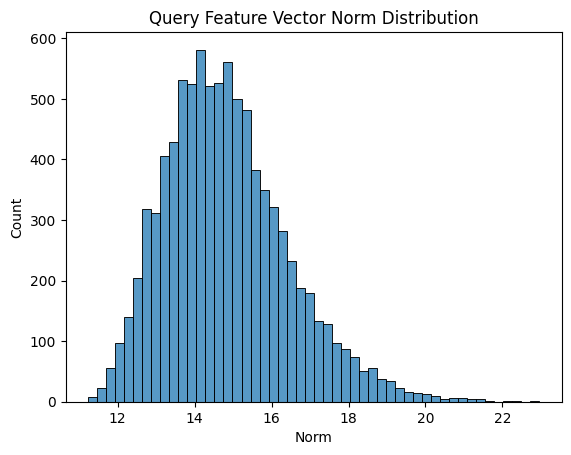

In [71]:
from numpy.linalg import norm
query_vectors = query_df.drop(columns=['query_id', 'event_timestamp']).values
query_norms = norm(query_vectors, axis=1)
sns.histplot(query_norms, bins=50)
plt.title("Query Feature Vector Norm Distribution")
plt.xlabel("Norm")
plt.ylabel("Count")
plt.show()

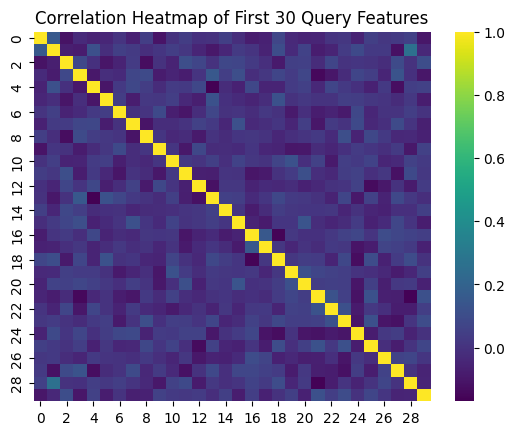

In [72]:
# ## Correlation Heatmap (Query Features)
sns.heatmap(pd.DataFrame(query_vectors).iloc[:, :30].corr(), cmap="viridis")
plt.title("Correlation Heatmap of First 30 Query Features")
plt.show()
